In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#edit

In [2]:
# import sys
# sys.path.append(r"/data/home/rszhou/xwtacs_folder_zhou")  # plos_utils.py 所在目录
from plos_utils import *

In [3]:
from Plos_ref.utils_data import get_net_weight,get_net_weight_all_subj
from Plos_ref.utils_stats import show_average

# S1. Load information


In [4]:
mcad_info = mcad_infotable()
adni_info = adni_infotable()
oasis_info = oasis_infotable_new()
mcad_df = mcad_info.get_baseline()
adni_df = adni_info.get_baseline_new()
oasis_df = oasis_info.get_baseline()

711 名被试通过了QC，其中NC: 232 MCI: 227  AD: 252
1037 个记录通过了QC，其中NC: 556 MCI: 380  AD: 101
621 个被试通过了QC，其中NC: 350 MCI: 235  AD: 68
701 个记录通过了QC，其中NC: 609 MCI: 0  AD: 92
506 个被试通过了QC，其中NC: 422 MCI: 0  AD: 87


In [6]:
xwtacs_info = xwtacs_infotable(fd_threshold=1.64,tSNR_threshold=39,move_threshold=100,rotate_threshold=100,group_name='number')
xwtacs_df = xwtacs_info.get_baseline()

114 条数据通过了QC
Session/Run 1: 46 条数据
Session/Run 2: 43 条数据
Session/Run 3: 25 条数据


# S2. Yeo template view


In [5]:
yeo_5124 = get_yeo()
yeo_left_right = np.zeros([2562,2])
yeo_left_right[:,0] = yeo_5124[:2562]
yeo_left_right[:,1] = yeo_5124[2562:]
yeo_left = yeo_5124[:2562] ; yeo_right = yeo_5124[2562:]

# S3. IFN analysis

## S3.1 grouplevel mean IFN

In [ ]:
mcad_indipar,_,mcad_indicorr = get_ind_par_by_subs(mcad_df['sub'].values,dataset='mcad',base_par="Plos_ref/IndiPar/{}/Py_fs4_from_fs5_confi_1_1/")

/data/home/rszhou/xwtacs_folder_zhou/Pin_Work/pin_ind_net/Plos_ref/utlis_stats_mcad.py:57: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=df,x='Network',y='Area',palette=yeo_color_array_18_no_ven)


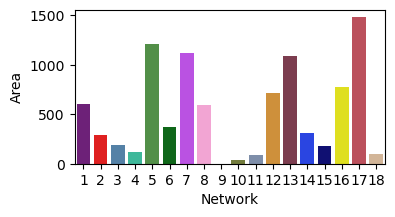

In [22]:
from Plos_ref.utlis_stats_mcad import show_average_mcad
mcad_diff_area = show_average_mcad(mcad_indipar,mcad_df)

/data/home/rszhou/xwtacs_folder_zhou/Pin_Work/pin_ind_net/Plos_ref/utlis_stats_mcad.py:57: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=df,x='Network',y='Area',palette=yeo_color_array_18_no_ven)


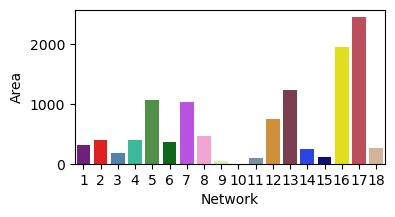

In [ ]:
adni_diff_area = show_average_mcad(adni_indipar,adni_df,dataset='adni')

/data/home/rszhou/xwtacs_folder_zhou/Pin_Work/pin_ind_net/Plos_ref/utlis_stats_mcad.py:57: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=df,x='Network',y='Area',palette=yeo_color_array_18_no_ven)


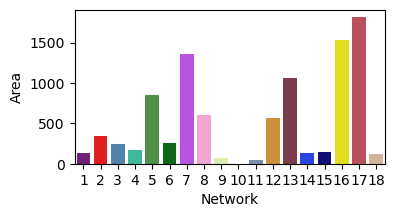

In [24]:
oasis_diff_area = show_average_mcad(oasis_indipar,oasis_df,dataset='oasis')

## S3.1.2 Group-level mean IFN compare

/tmp/ipykernel_4059810/3869777040.py:4: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.scatterplot(x=mcad_diff_area['Area'], y=xwtacs_diff_area_sham['Area'], hue=list(range(1, 19)), palette=yeo_color_palette_19[1:], legend=False,s=70)


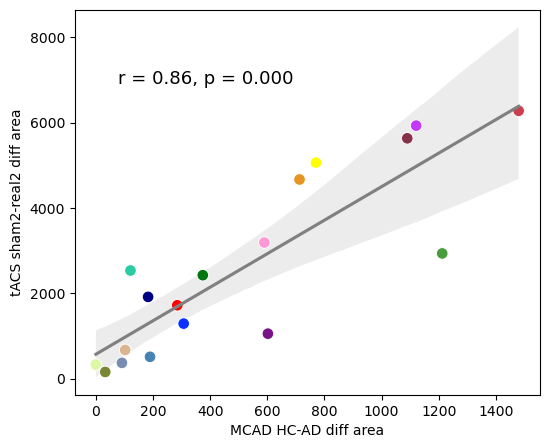

In [ ]:
r, p = stats.pearsonr(mcad_diff_area['Area'], xwtacs_diff_area_sham['Area'])
plt.figure(figsize=[6,5])
sns.regplot(x=mcad_diff_area['Area'], y=xwtacs_diff_area_sham['Area'], scatter=False, color='gray')
sns.scatterplot(x=mcad_diff_area['Area'], y=xwtacs_diff_area_sham['Area'], hue=list(range(1, 19)), palette=yeo_color_palette_19[1:], legend=False,s=70)
plt.xlabel('MCAD HC-AD diff area'); plt.ylabel('tACS sham2-real2 diff area')
# plt.text(2, 70, 'r = {:.2f}, p = {:.2f}'.format(r, p), fontsize=15)
plt.text(
    x=0.05 * plt.xlim()[1],  
    y=0.8 * plt.ylim()[1],  
    s='r = {:.2f}, p = {:.3f}'.format(r, p),
    fontsize=13
)
plt.savefig('/data/home/rszhou/xwtacs_folder_zhou/Plos_ref/results_figure/S2_mean_topo/tacssham2-MCAD_CORR.pdf', bbox_inches='tight')


## S3.2 AD IFN pattern

#### NC for normative model (border) & select 40 cluster

cluster 40:network 5 12 14 17

In [ ]:
def get_weight_difference(indiweight,infotable):
    individual_parc_diff = np.zeros([18,indiweight.shape[2]])
    individual_parc_p = np.zeros([18,indiweight.shape[2]])

    for i in range(18):
        df,feature = screen_site(infotable,indiweight[:, i, :])
        feature = pre_feature(feature,df)
        individual_parc_diff[i,:],individual_parc_p[i,:]  = stats.ttest_ind(
            feature[df.Group == 'AD', :], feature[df.Group == 'NC', :]
        )
        individual_parc_diff[i,yeo == 0] = 0
    individual_parc_diff_sig = individual_parc_diff.copy()
    individual_parc_q = individual_parc_p.copy()
    for i in range(18):
        _, individual_parc_q[i,yeo > 0] = fdrcorrection(individual_parc_p[i,yeo > 0])
    individual_parc_diff_sig[individual_parc_q>0.05] = 0
    return individual_parc_diff, individual_parc_diff_sig, individual_parc_q

def draw_par_diff(diff,dataset_label,mask=None,border=None,prefix=None):    
    fig,axes = plt.subplots(3,6,figsize=(15,8))
    if(mask is None):
        mask = np.ones_like(diff)
    for i in range(18):
        network = diff[i,:].copy()
        network[network == 0] = np.nan
        network[mask[i] == 0] = np.nan
        border_i = np.zeros_like(network)
        border_i[border[i] > 0] = 1
        plot_surf_fsa4(left_data=network[:2562],right_data=network[2562:],cmap='coolwarm',if_roi=False, colorbar=False, vmin=-5,vmax=5,
                output_file="Plos_ref/results_figure/S5_analysis/topographic/{}/ad-nc_compare_parcell_{}_fs4.png".format(dataset_label,(i+1)),alpha=1,
                overlay_roi = border_i
        ) 
        axes[i//6,i%6].imshow(Image.open("Plos_ref/results_figure/S5_analysis/topographic/{}/ad-nc_compare_parcell_{}_fs4.png".format(dataset_label,(i+1))))#.crop((100, 50, 700, 500)))
        axes[i//6,i%6].axis('off')
        axes[i//6,i%6].title.set_text(netnames[i])
    plt.axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig("Plos_ref/results_figure/S5_analysis/topographic/{}/ad-nc_compare_parcell_fs4_{}.png".format(dataset_label,prefix),bbox_inches='tight',dpi=300)

def draw_par_diff_pdf(diff,dataset_label,mask=None,prefix=None):    
    if(mask is None):
        mask = np.ones_like(diff)
    for i in range(18):
        network = diff[i,:].copy()
        network[network == 0] = np.nan
        network[mask[i] == 0] = np.nan
        plot_surf_fsa4(left_data=network[:2562],right_data=network[2562:],cmap='coolwarm',if_roi=False, colorbar=False, vmin=-5,vmax=5,darkness=0.1,
                output_file="Plos_ref/results_figure/S5_analysis/topographic/{}/ad-nc_compare_parcell_{}_{}_fs4.pdf".format(dataset_label,prefix,(i+1))
                ,alpha=1
        ) 
    #plt.savefig("Plos_ref/results_py/S5_analysis/{}/topographic/ad-nc_compare_parcell.png".format(dataset_label),bbox_inches='tight',dpi=400)

In [ ]:
def get_network_range(indipar, df, group = 'NC'):
    network_ratio = np.sum(indipar[df.Group ==  group ],axis = 0) / np.sum(df.Group == group)
    network_range = network_ratio[1:].copy()
    network_range[network_range < 0.05] = 0
    network_range[network_range > 0] = 1
    return network_range, network_ratio


/tmp/ipykernel_650216/238187375.py:11: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(network) * 0.9
/data/home/rszhou/.conda/envs/rszhouenvs39/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:88: RuntimeWarning: All-NaN slice encountered
  stat_map_min = np.nanmin(stat_map_data)
/data/home/rszhou/.conda/envs/rszhouenvs39/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:91: RuntimeWarning: All-NaN slice encountered
  stat_map_max = np.nanmax(stat_map_data)


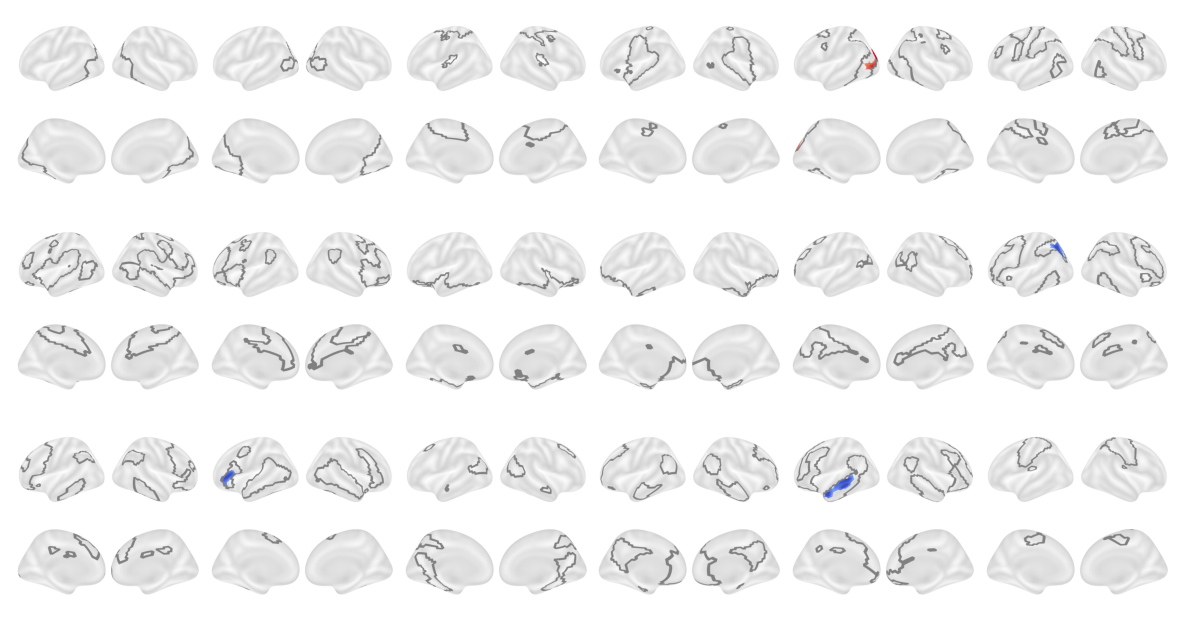

In [611]:
from plos_utils import netnames
draw_par_diff(mcad_cluster_sig_40,'mcad',mask=None,border=mcad_network_range,prefix='sig_cluster_40')

## S3.3 AD/MCI/NC IFN compare

In [ ]:
def show_area_boxplot2(func_net,infotable,indx=None,sub_col='sub',tsnr_col = 'tSNR', group_cmap = group_cmap, save_path ='',**kwgs):
    from plos_utils import regress_cov_linear
    #netnames = ['VS1','VS2','SM1','SM2','DA1','DA2','VA','SA','Lim1','Lim2','Con1','Con2','Con3','Aud','Def1','Def2','Def3','SM3']
    #netorders = ['VS1','VS2','SM1','SM2','SM3','DA1','DA2','VA','SA','Lim1','Lim2','Con1','Con2','Con3','Aud','Def1','Def2','Def3']
    
    if(indx is not None):
        indipar = indipar[indx]
    df = infotable.loc[:,[sub_col,'Group','tacs_group','Age','Gender','center',tsnr_col]]
    df,data = screen_site(df,func_net)
    data = pre_feature(data,df,**kwgs)
    df.loc[:,['%d' % i for i in range(1,19)]] = data #编号放在第一行
    
    df = pd.melt(df,id_vars=[sub_col,'Gender','Age','center','Group','tacs_group',tsnr_col],var_name='Network',value_name='Area',)
    box_pairs = []
    for i in range(1,19):
        box_pairs.append((("%d" % i,1),("%d" % i,2)))
        # box_pairs.append((("%d" % i,1),("%d" % i,3)))
    hue_order = [1,2,3] if 3 in df.Group.tolist() else [1,2]
    #compare all code
    # box_pairs = []
    # group_list = [1,2,3] if 3 in df.Group.tolist() else [1,2]
    # from itertools import combinations
    # for i in range(1,19):
    #     for g1, g2 in combinations(group_list, 2):
    #         box_pairs.append((("%d" % i,g1),("%d" % i,g2)))
    plt.figure(figsize=[12,2])
    ax = sns.barplot(data=df,x='Network',y="Area", hue='Group', hue_order=hue_order,palette=group_cmap)
    annotator = Annotator(ax, box_pairs, data=df, x='Network', y='Area',hue='Group',hue_order=hue_order,verbose=1)
    annotator.configure(test='t-test_ind', text_format='star', loc='inside',show_test_name=False,text_offset=5)
    annotator.apply_and_annotate()
    ax.get_legend().remove()
    plt.savefig(save_path,bbox_inches='tight')

    return df

## S3.4 network transform

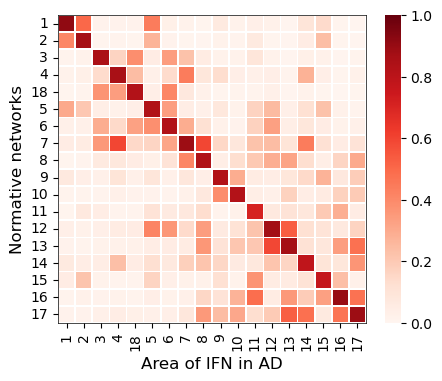

In [ ]:
mcad_indipar_devation = mcad_indipar.copy()[:,1:,:]
#mcad_indipar_devation[:,mcad_network_range == 0] = 0
mcad_indipar_devation = mcad_indipar_devation * fs4_area_weight

trans_matrix = np.zeros([mcad_indipar_devation.shape[0],18,18])
for i in range(trans_matrix.shape[0]):
    for j in range(18):
        for k in range(18):
            trans_matrix[i,j,k] = np.sum(mcad_indipar_devation[i,func_order[k] - 1,mcad_network_range[func_order[j] - 1] > 0]) / np.sum(mcad_indipar_devation[i,func_order[k]-1])

trans_matrix_ps = np.zeros([18,18])
for i in range(18):
    for j in range(18):
        _, trans_matrix_ps[i,j] = stats.ttest_1samp(trans_matrix[mcad_df.Group == 'AD',func_order[i] - 1,func_order[j] - 1],0)

trans_matrix_ps[trans_matrix_ps == np.nan] = 1
plt.figure(figsize=(5,4))
ax = sns.heatmap(np.mean(trans_matrix[mcad_df.Group == 'AD'],0),cmap='Reds',vmin=0,square= True, linewidths= 0.5, vmax=1,
            xticklabels=func_order, yticklabels=func_order)
for i in ['left','right','bottom','top']:
    ax.spines[i].set_visible(True)
    ax.spines[i].set_linewidth(0.5)
ax.set_xlabel('Area of IFN in AD', fontsize=12)
ax.set_ylabel('Normative networks', fontsize=12)

## S3.5 fingerprint

In [ ]:
def show_fingerprint(data_path,ax):
    columns = ['{}'.format(i) for i in range(1,19)]
    columns.append('All')
    finger_idr = np.load(data_path)
    finger_idr = pd.DataFrame(finger_idr.T,columns=columns)
    finger_idr = pd.melt(finger_idr, value_name='IDR', var_name='Func Net')
    colors = yeo_cmap_19.colors[1:]
    colors.append(yeo_cmap_19.colors[0])
    sns.boxplot(data=finger_idr,x='Func Net',y='IDR',palette=sns.color_palette(colors),
            color=yeo_cmap_19,width=0.3,linewidth=0.5,fliersize=2,ax=ax)
    ax.set_ylim([0,1])

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(10,4))
show_fingerprint("Plos_ref/results_py/S5_fingerprint/oasis/two_session_IDR_GROUP_1.npy",axes[0,0])
show_fingerprint("Plos_ref/results_py/S5_fingerprint/oasis/two_session_IDR_GROUP_3.npy",axes[0,1])
show_fingerprint("Plos_ref/results_py/S5_fingerprint/oasis/IDR_GROUP_1.npy",axes[1,0])
show_fingerprint("Plos_ref/results_py/S5_fingerprint/oasis/IDR_GROUP_3.npy",axes[1,1])
axes[0,0].set_title('OASIS NC two_session  N=147')
axes[0,1].set_title('OASIS AD two_session  N=7')
axes[1,0].set_title('OASIS NC two_run  N=350')
axes[1,1].set_title('OASIS AD two_run  N=69')
plt.tight_layout()
plt.savefig('Plos_ref/results_figure/S5_fingerprint/oasis/oasis.pdf',bbox_inches='tight')